In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

In [4]:
np.random.seed(42) ## Setting manually for reproducibility

## One Dimensional Normal Distribution

In [18]:
def plot_1D_gaussian(mean=0, stddev=1, sample_size=1000):

    '''
    Generates and plots a one dimensional gaussian (normal distribution)
    (mean, stddev) define the distribution
    sample_size: number of samples taken for plotting
    '''

    #Sampling and plotting
    samples = np.random.normal(mean, stddev, sample_size)
    
    plt.figure(figsize=(10,6))
    plt.xlim(-5, 5)
    counts, bins, _ = plt.hist(samples, bins=30, density=True, alpha=0.7, 
                             color='skyblue', label='Sampled Histogram')

    x = np.linspace(min(bins), max(bins), 100) ## Generating points for the PDF
    pdf = stats.norm.pdf(x,mean,stddev) ##Generating prob values for each x

    # Plot the PDF
    plt.plot(x, pdf, 'r-', lw=2, label='PDF')
    
    plt.title(f'1D Gaussian Distribution (μ={mean}, σ={stddev})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    

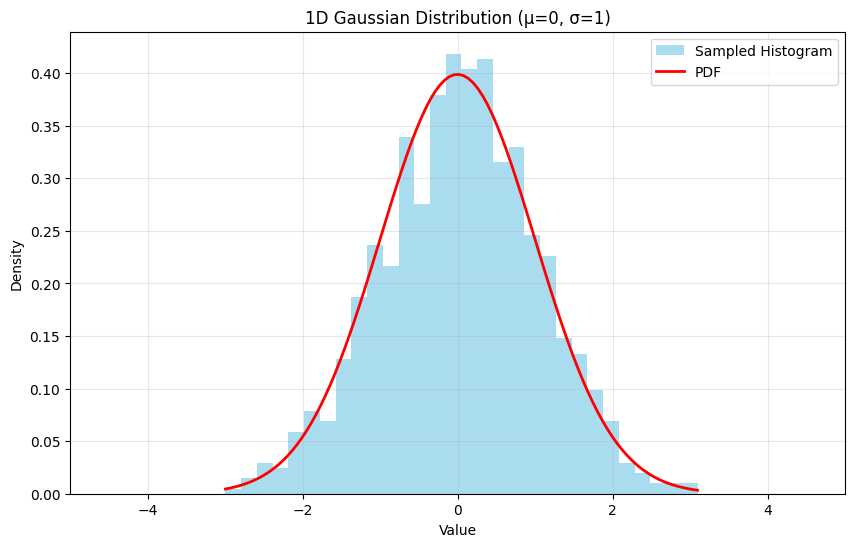

In [19]:
plot_1D_gaussian() ## Standard Normal

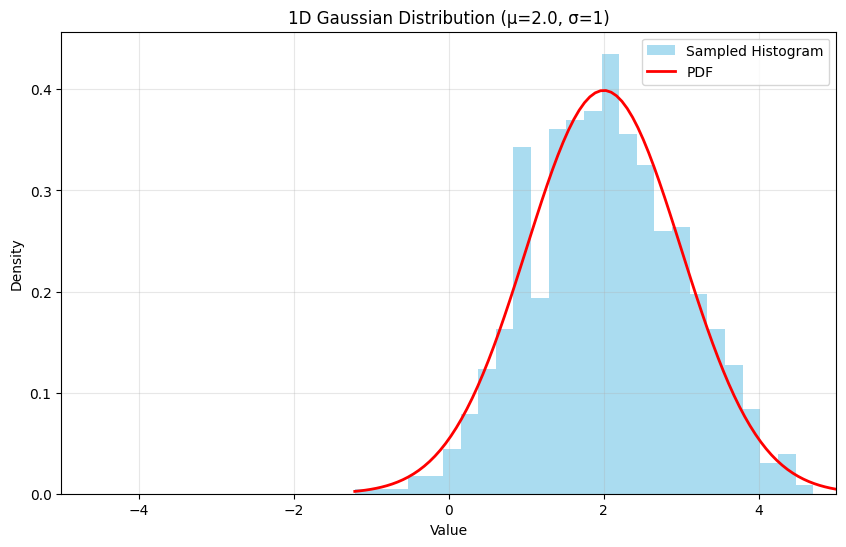

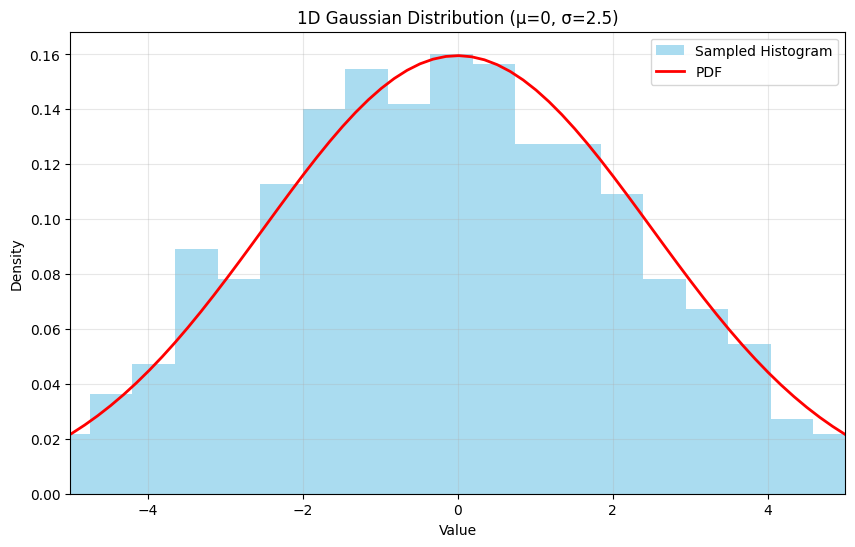

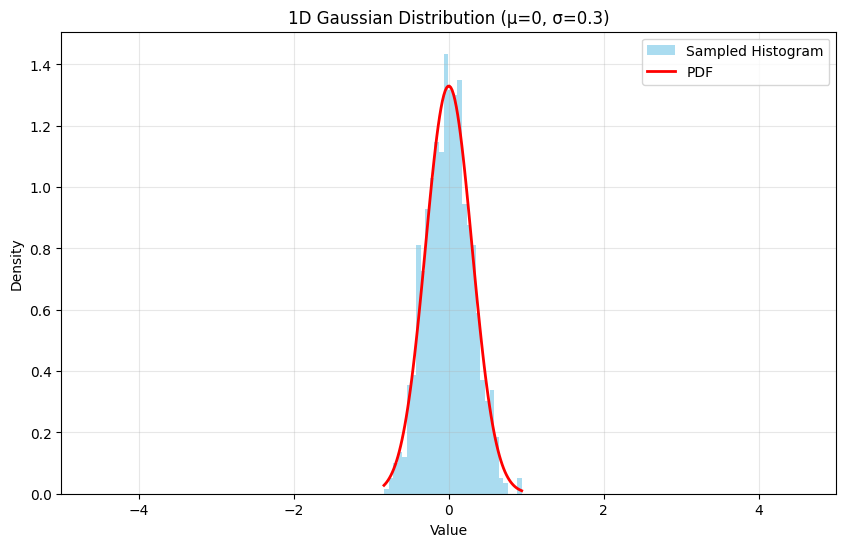

In [21]:
## Varying the mean and variance
plot_1D_gaussian(mean=2.0, stddev=1)
plot_1D_gaussian(mean=0, stddev=2.5)
plot_1D_gaussian(mean=0, stddev=0.3)

## 2 Dimensional Normal Distribution

nice reference: [PSU Multivariate Normal](https://online.stat.psu.edu/stat505/book/export/html/636)

In [26]:

def plot_2d_gaussian(mean=[0, 0], cov=[[1, 0], [0, 1]], sample_size=1000):
    """
     2D Gaussian distribution with scatter, contour, and surface plots.
    
    Parameters:
    (mean, cov): define the 2D Gaussian
    sample_size (int): Number of samples to generate
    """
    
    samples = np.random.multivariate_normal(mean, cov, sample_size)
    
    # Create a grid of points
    x = np.linspace(min(samples[:, 0]) - 1, max(samples[:, 0]) + 1, 100)
    y = np.linspace(min(samples[:, 1]) - 1, max(samples[:, 1]) + 1, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    
    # Calculate PDF values
    rv = stats.multivariate_normal(mean, cov)
    Z = rv.pdf(pos)
    
    # Create figure with three subplots
    fig = plt.figure(figsize=(15, 5))
    
    # 1. Scatter plot
    ax1 = fig.add_subplot(131)
    ax1.scatter(samples[:, 0], samples[:, 1], alpha=0.5, c='skyblue')
    ax1.set_title('Scatter Plot')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-5,5)
    ax1.set_ylim(-5,5)
    
    # 2. Contour plot
    ax2 = fig.add_subplot(132)
    ax2.contour(X, Y, Z, levels=10, cmap='viridis')
    ax2.set_title('Contour Plot')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(-5,5)
    ax2.set_ylim(-5,5)
    
    # 3. 3D surface plot
    ax3 = fig.add_subplot(133, projection='3d')
    surf = ax3.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax3.set_title('3D Surface Plot')
    ax3.set_xlim(-5,5)
    ax3.set_ylim(-5,5)
    
    plt.tight_layout()
    plt.show()


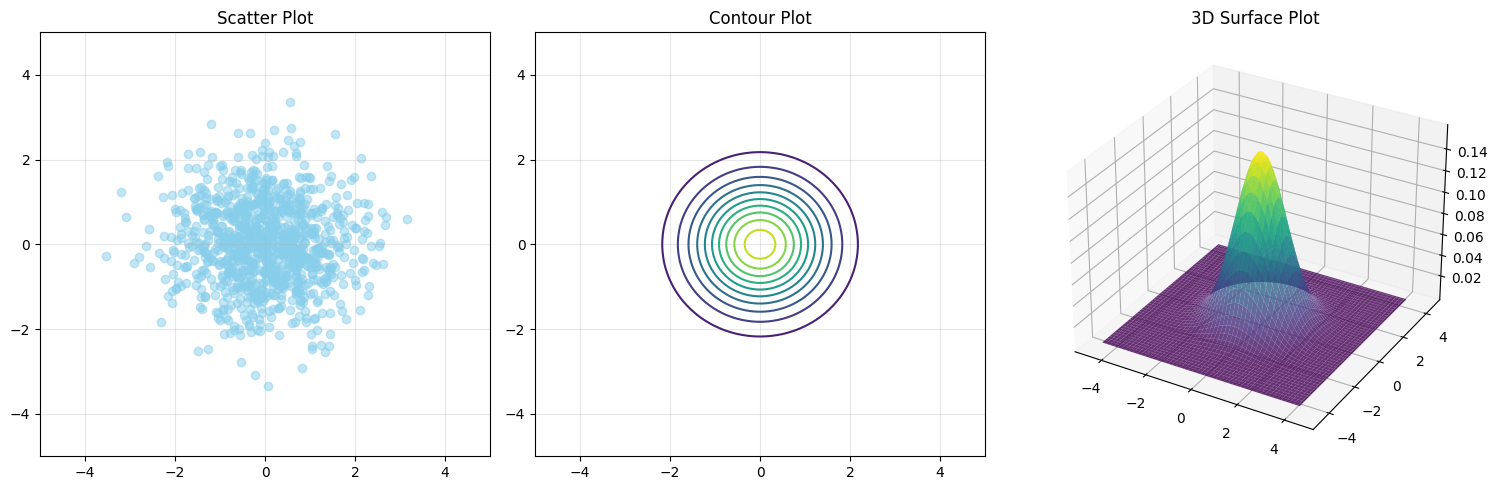

In [31]:
plot_2d_gaussian([0,0],[[1,0],[0,1]])

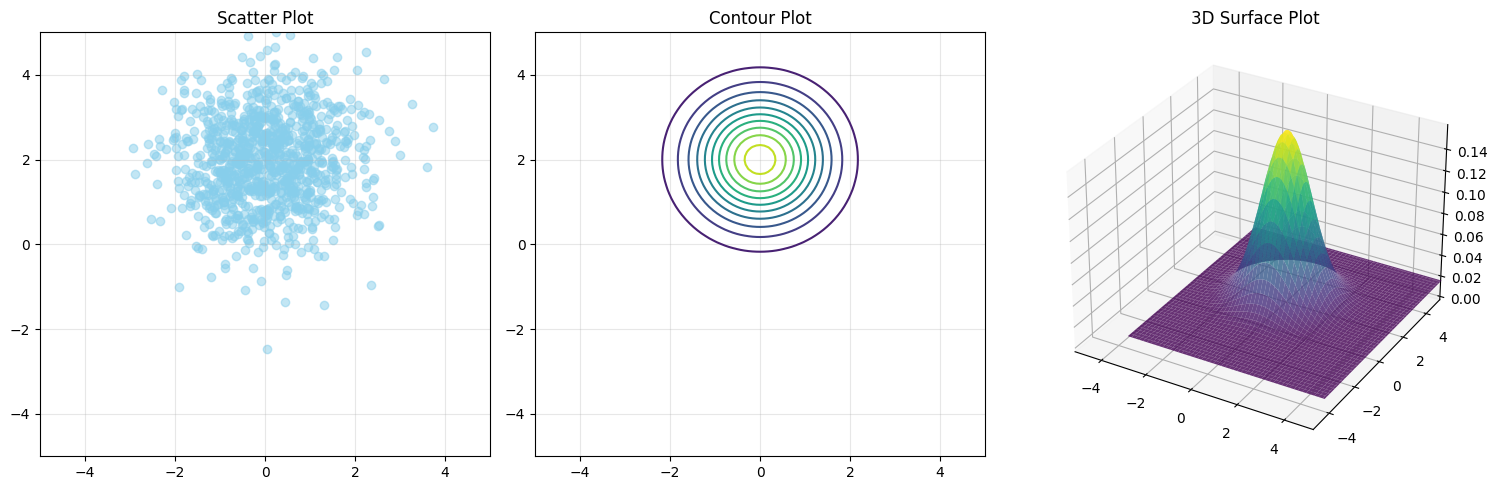

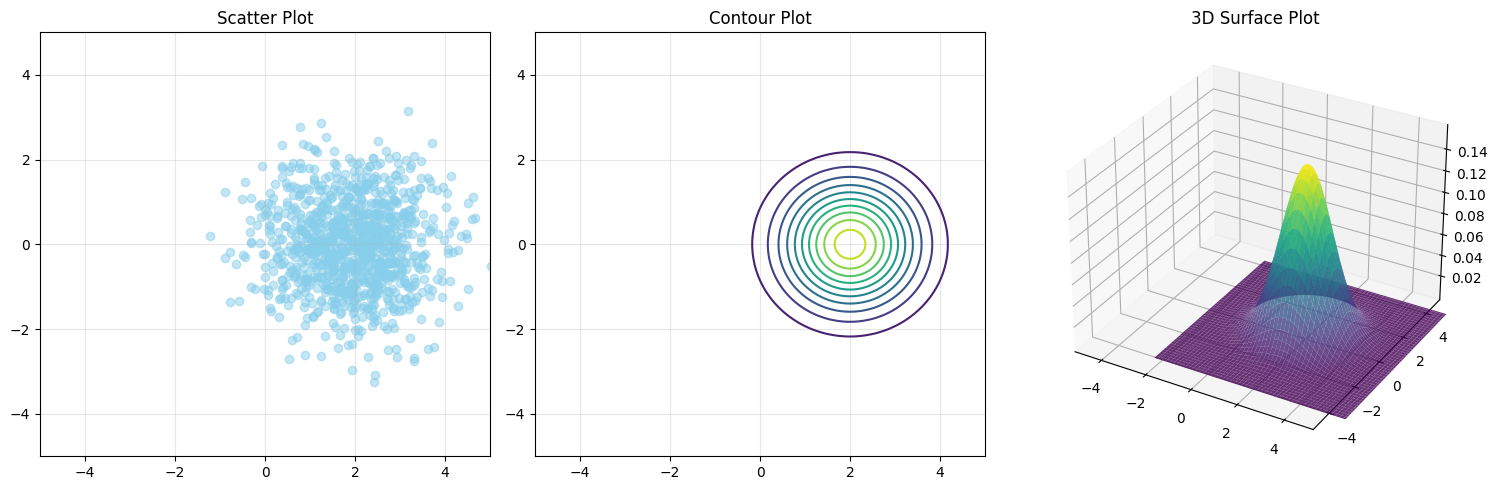

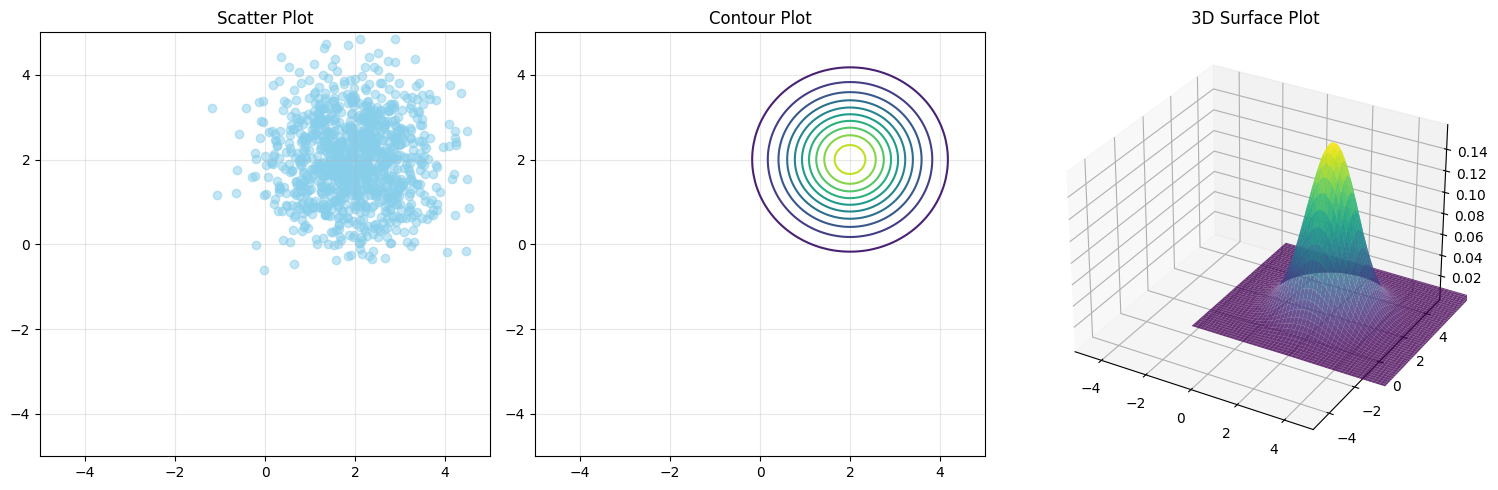

In [32]:
## Experimenting with diff mean values
plot_2d_gaussian([0,2], [[1,0],[0,1]])
plot_2d_gaussian([2,0], [[1,0],[0,1]])
plot_2d_gaussian([2,2], [[1,0],[0,1]])

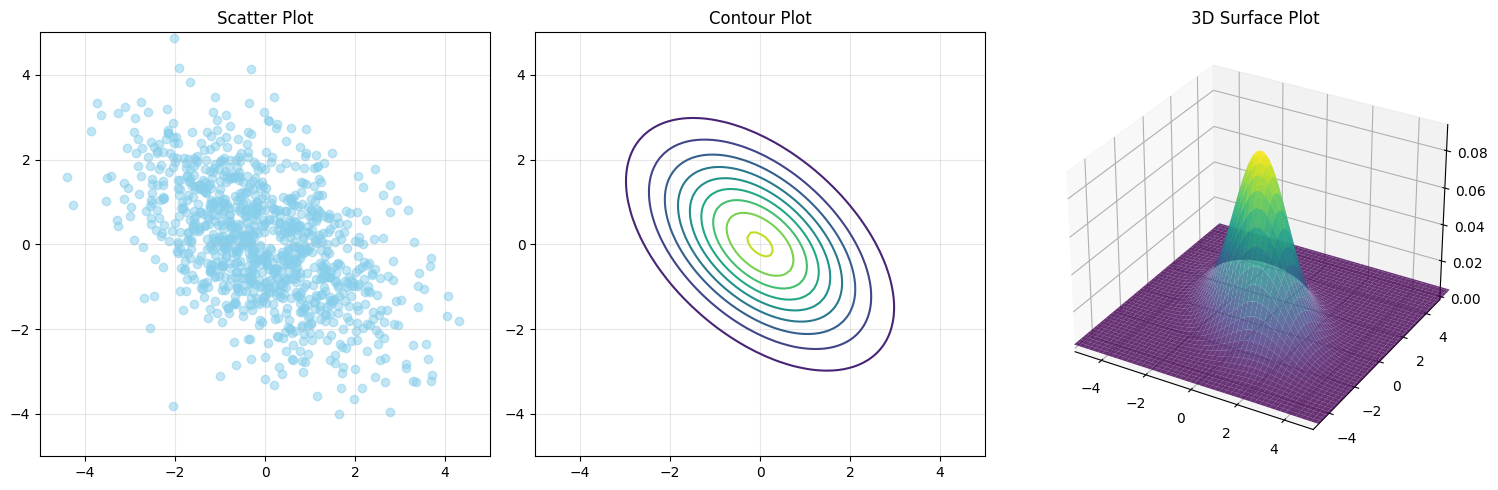

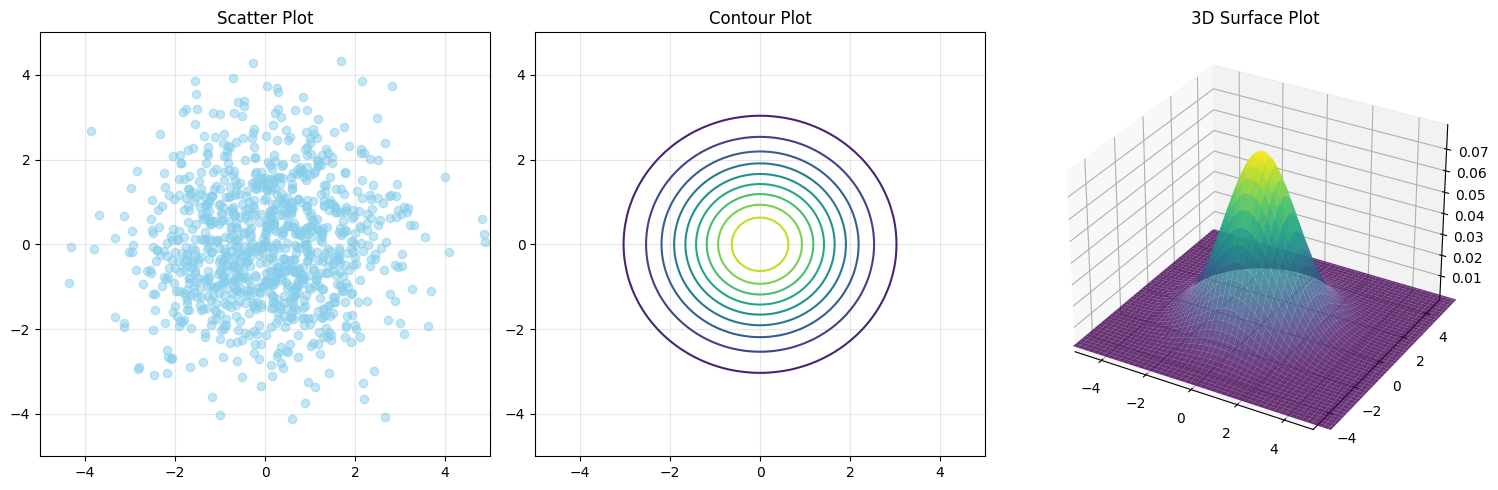

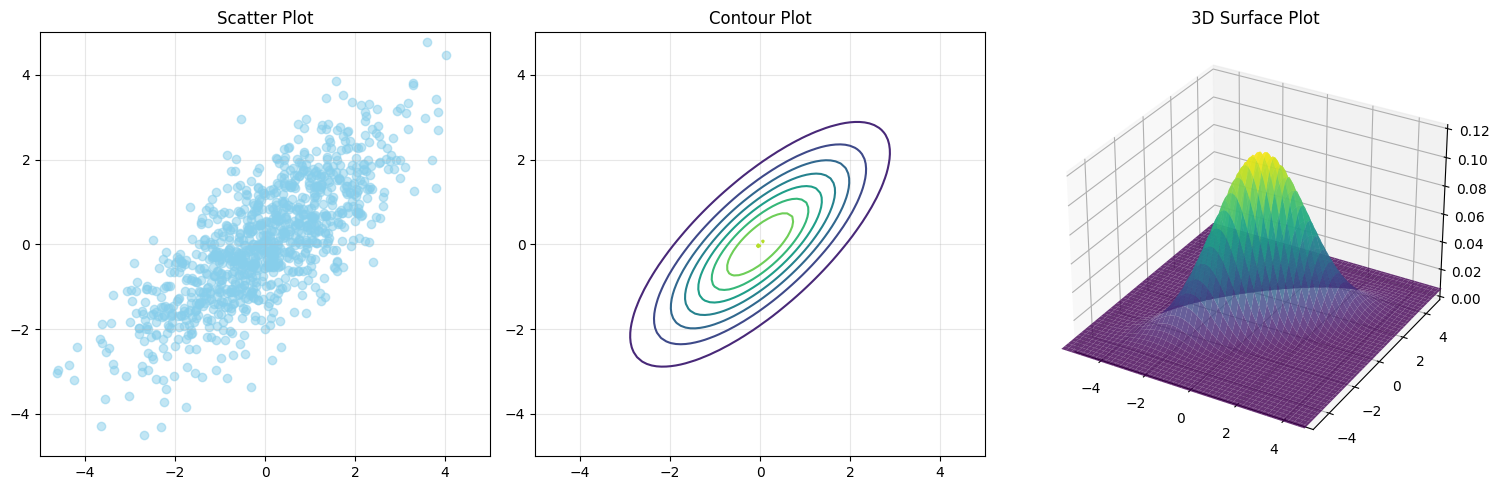

In [38]:
## Experimenting with diff cov values
plot_2d_gaussian([0,0], [[2, -1], [-1, 2]])
plot_2d_gaussian([0,0], [[2, 0], [0, 2]])
plot_2d_gaussian([0,0], [[2, 1.5], [1.5, 2]])